## 미리 학습된 언어 모델
### 언어 모델
- 단어 시퀀스에 확률을 부여하는 모델
- 단어 시퀀스를 입력받아 해당 시퀀스가 얼마나 그럴듯한지 확률을 출력하는 모델
- 출력은 n개 단어가 동시에 나타날 확률 내포
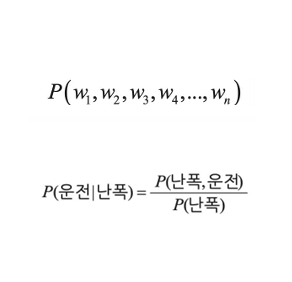
- **난폭**이 나타난 다음에 **운전**이 나타날 확률(조건부 확률)
- 결과가 되는 사건(운전)은 조건이 되는 사건(난폭)의 영향을 받아 변한다는 개념 내포
<br>
- 조건부 확률의 정의에 따라 단어 3개가 동시에 등장할 결합 확률을 수식으로 나타냄
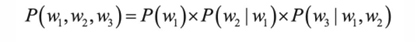
<br>
- 단어 3개로 구성된 문장이 나타나려면(단어 3개가 동시에 등장하려면)
    - 첫번째 단어 등장
    - 첫번째 단어 등장 후 두번째 단어 등장
    - 첫번째 단어와 두번째 단어 등장 후 세번째 단어 등장

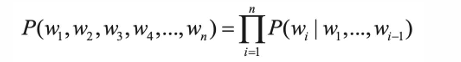
- 언어 모델을 조건부 확률 개념으로 다시 쓴 모습

- 전체 단어 시퀀스가 나타날 확률은 이전 단어들이 주어졌을 때 다음 단어가 등장할 확률의 연쇄

### 순방향 언어 모델
- 문장 앞부터 뒤로, 사람이 이해하는 순서대로 계산하는 모델
- GPT, ELMo 같은 모델이 이런 방식으로 프리트레인함

### 역방향 언어 모델
- 문장 뒤부터 앞으로 계산하는 모델
- ELMo 같은 모델이 이런 방식으로 프리트레인함
    - ELMo(Embedding from Language Models)는 순방향과 역방향 언어 모델 모두 활용하는 기법
    
### 넓은 의미의 언어 모델
- context(주변 맥락 정보)가 전제된 상태에서 특정 단어가 나타날 조건부 확률
- 단어나 단어 시퀀스로 구성된 컨텍스트를 받아 특정 단어가 나타날 확률을 출력
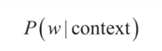

#### 마스크 언어 모델(masked language model)
- 학습 대상 문장에 빈칸을 만들어 놓고 해당 빈칸에 올 단어로 적절한 단어가 무엇일지 분류하는 과정으로 학습
- BERT가 마스크 언어 모델로 프리트레인하는 대표적인 모델
- 맞힐 단어를 계산할 때 문장 전체의 맥락을 참고할 수 있다는 장점
- 마스크 언어 모델은 양방향 성질이 있음

#### 스킵-그램 모델(skip-gram model)
- 어떤 단어 앞뒤에 특정 범위를 정해 두고 이 범위 내에 어떤 단어들이 올지 분류하는 과정으로 학습
- 컨텍스트로 설정한 단어 주변에 어떤 단어들이 분포해 있는지를 학습
- Word2Vec이 스킵-그램 모델로 학습함

### 언어 모델의 유용성
- 잘 학습된 언어 모델은 어떤 문장이 자연스러운지 가려낼 수 있고(학습 대상 언어의 풍부한 맥락 포함), 기계 번역, 문법, 교정, 문장 생성 등 다양한 태스크를 수행 가능
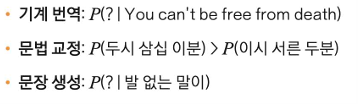

#### 언어 모델이 주목받는 이유
- 데이터 제작 비용
    - 사람이 수작업 해야 하는 레이블 없이도 많은 학습 데이터를 싼 값에 만들어 낼 수 있음
- 트랜스퍼 러닝
    - 프리트레인한 언어 모델을 문서 분류, 개체명 인식 등 다운스트림 태스크에 적용하면 적은 양의 데이터로도 그 성능을 큰 폭으로 올릴 수 있음


#### kcbert-large 모델
- 12GB 크기의 네이버 댓글 데이터로 학습한 BERT, 마스크 언어 모델 방식으로 프리트레인


## 트랜스포머 살펴보기
### 시퀀스-투-시퀀스(sequence-to-sequence)
###### 트랜스포머
- 기계 번역 등 시퀀스-투-시퀀스 과제를 수행하는 모델
###### 시퀀스
- 단어 같은 무언가의 나열
###### 시퀀스-투-시퀀스
- 특정 속성을 지닌 시퀀스(소스 시퀀스)를 다른 속성의 시퀀스(타깃 시퀀스)로 변환하는 작업
- 소스와 타깃의 길이가 달라도 해당 과제를 수행하는 데 문제가 없어야 함<br>
<br>

**기계 번역**
- 어떤 언어의 토큰 시퀀스를 다른 언어의 토큰 시퀀스로 변환하는 과제
- 소스 시퀀스의 길이(토큰 6개)와 타깃 시퀀스의 길이가 다름

### 인코더와 디코더
- 시퀀스-투-시퀀스 과제 수행 모델은 대개 인코더(encoder)와 디코더(decoder)2개의 파트로 구성
- **인코더** : 소스 시퀀스의 정보를 압축해 디코더로 보내는 역할 담당
- **디코더** : 인코더가 보내준 소스 시퀀스 정보를 받아서 타깃 시퀀스 생성
- 인코딩 : 인코더가 소스 시퉘스 정보를 압축하는 과정
- 디코딩 : 디코더가 타깃 시퀀스를 생성하는 과정

#### 트랜스포머
- 인코더의 입력은 소스 시퀀스
- 디코더의 입력은 타깃 시퀀스
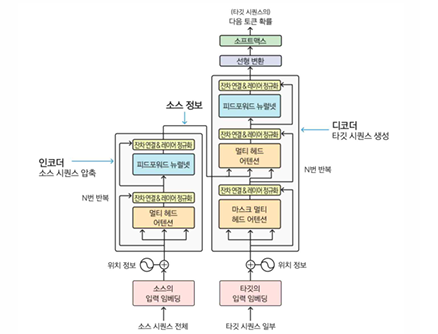

### 모델 학습 과정 특징
- < s >는 타깃 시퀀스의 시작을 뜻하는 스페셜 토큰
- 학습 중의 디코더 입력과 실제 기계 번역에 사용할 때(인퍼런스)의 디코더 입력 다름
- 학습 과정에서는 디코더 입려겡 맞혀야 할 단어 이전의 정답 타깃 시퀀스를 넣어줌
- 인퍼런스때 현재 디코더 입력에직전 디코딩 결과를 사용

### 트랜스포머 블록
- 트랜스포머의 인코더 가운데 반복되는 요소를 떼어내 다시 나타낸 것
- 블록 또는 레이어
- 구성 요소
    - 멀티 헤드 어텐션(multi-head attention)
    - 피드포워드 뉴럴 네트워크(feedfoward neural network)
    - 잔차 연결(resudial connection) 및 레이어 정규화(layer normalization)등
- 디코더 쪽 블록의 구조도 인코더 브록과 본질적으로 다르지 않음
- 마스크를 적용한 멀티 헤드 어텐션
- 인코더가 보내온 정보와 디코더 입력을 함께 이용하여 멀티 헤드 어텐션을 수행하는 모듈을 추가

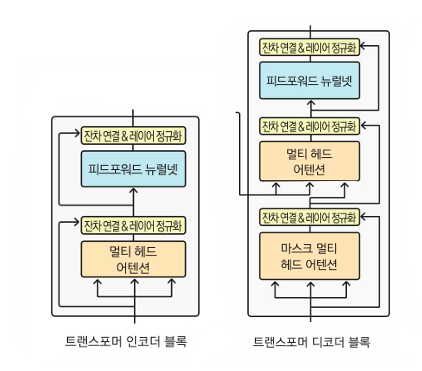

### 셀프 어텐션(self-attention)
- 트랜스포머 구조에서 멀티헤드 어텐션은 셀프 어텐션이라 부름
- 자기 자신에게 수행하는 어텐션 기법
- 수행 대상은 입력 시퀀스 전체
- 개별 단어와 전체 입력 시퀀스를 대상으로 어텐션 계산을 수행해 문맥 전체를 고려
- 모든 경우의 수를 고려하기 때문에 시퀀스 길이가 길어지더라도 정보를 잊거나 왜곡할 염려가 없음<br>
**어텐션**<br>
    - 시퀀스 입력에 수행하는 기계학습 방법의 일종
    - 시퀀스 요소 가운데 중요한 요소에 집중
- 입력 시퀀스 가운데 테스크 수행에 의미 있는 요소들을 위주로 정보를 추출

##### 합성곱 신경망(CNN)과 비교
- 합성곱 필터라는 특수한 장치를 이용해 시퀀스의 지역적인 특징을 잡아내는 모델
- 합성곱 필터가 단어르 하나씩 넘기면서 하나씩 차례대로 읽어들임
- 필터 크기를 넘어슨 눔맥은 읽어내기 어려움

##### 순환 신경망(RNN)과 비교
- 시퀀스 길이가 길어질수록 정보 압축에 문제가 발생
- 오래된 단어는 잊어버리거나, 특정 단어 정보를 과도하게 반영해 전체 정보를 외곡하는 경우 발생

##### 어텐션과 비교
- 디코더 쪽 RNN에 어텐션을 추가하는 방식
- 디코더가 타깃 시퀀스를 생성할 때 소스 시퀀스 전체에 어떤 요소에 주목해야 하는지를 알려줌

#### 셀프 어텐션 특징 및 장점
- 잘 학습된 모델이라면 '어제 카페 갔었어 거기 사람 많더라' 에서 '거기'에 대응하는 장소는 '카페', '거기'와 '갔었어'도 연관이 있음을 확인
- 인코더 내부에서 '거기'라는 단어를 인코딩 할 때 '카페','갔었어'라는 연관있는 단어의 의미를 강조해서 반영
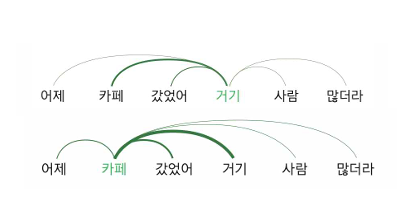

#### 어텐션과 셀프 어텐션의 주요 차이
1. 어텐션은 소스 시퀀스 전체 단어들(어제, 카페,..., 많더라)과 타킷 시퀀스 단어 하나(cafe) 사이를 연결하는데 쓰임, 반면 셀프 어텐션은 입력 시퀀스 전체 단어들 사이를 연결함
2. 어텐션은 RNN 구조 위에서 동작하지만 셀프 어텐션은 RNN없이 동작함
3. 타깃 언어의 단어를 1개 생성할 때 어텐션은 1회 수행하지만 셀프 어텐션은 인코더, 디코더 블록의 개수만큼 반복 수행함

#### 계산 예시
- 쿼리(query),키(key),밸류(value) 3가지 요소가 서로 영향을 주고받는 구조
    - 트랜스포머 블록에는 문장 내 각 단어가 벡터 형태로 입력
- 각 단어 벡터는 계산 과정을 거쳐 쿼리, 키, 밸류 3가지로 변환
- 쿼리 단어들을 모든 키 단어와의 관계를 합이 1인 확률값으로 나타냄
- 셀프 어텐션 모듈은 그 결과에 밸류 벡터들의 가중합하는 방식으로 계산
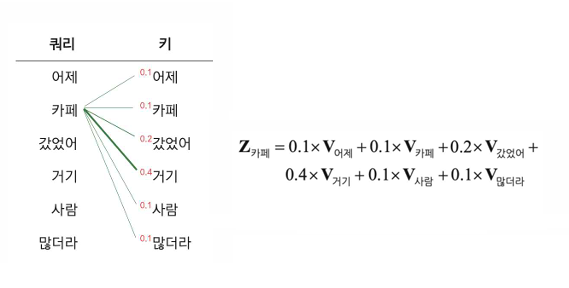

## 셀프 어텐션 동작 원리
### 모델 입력과 출력
#### 입력층(input layer)
- 모델의 입력을 만드는 계층
- 인코더 입력은 소스 언어 문장의 토큰 인덱스 시퀀스
- 소스 시퀀스의 입력 임베딩에 위치 정보(positional encoding)추가
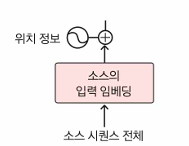

#### 인코더와 디코더 블록
- 최초 인코더 블록의 입력 : 인코더 입력층에서 만들어진 벡터 시퀀스
- 그 출력 벡터 시퀀스가 두번째 인코더 블록의 입력
- 반복
- 최초 디코더 블록의 입력 : 디코더 입력층에서 만들어진 벡터 시퀀스
- 그 출력 벡터 시퀀스가 두 번째 디코터의 입력
- 반복
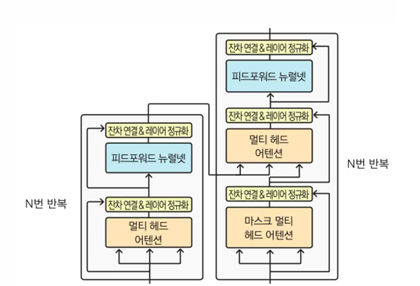

#### 출력층(output layer)
- 출력층의 입력은 디코더 마지막 블록의 출력 벡터 시퀀스
- 출력은 타깃 언어의 어휘 수만큼의 차원을 갖는 벡터
- 이 벡터는 디코더에서 입력된 타깃 시퀀스의 다음 토큰 확률 분포
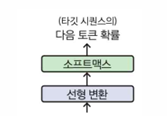

#### 셀프 어텐션 내부 동작
- 인코더의 셀프 어텐션
1. 쿼리, 키 밸류 만들기
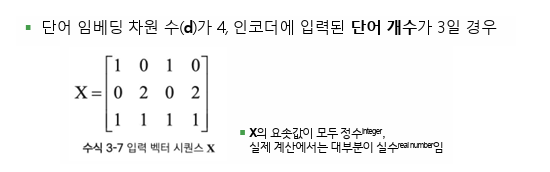
- 입력 벡터 시퀀스(X)에 쿼리, 키, 밸류를 만들어 주는 행렬(W)를 각각 곱함
- 입력 벡터 시퀀스가 3개일 때 수식을 적용하면 쿼리, 키, 밸류는 각각 3개씩 총 9개의 벡터
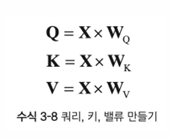
- 입력 벡터 시퀀스(X)에 쿼리를 만들어 주는 행렬(W)을 각각 곱함
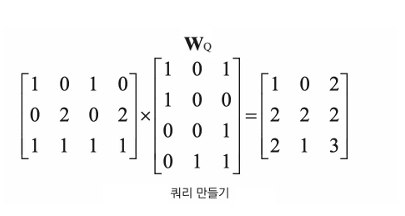
- 입력 벡터 시퀀스(X)에 키를 만들어 주는 행렬(W)을 각각 곱함
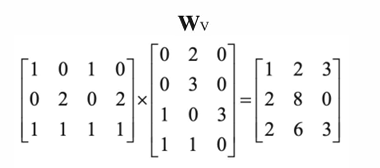
2. 첫 번째 쿼리의 셀프 어텐션 출력값 계산하기
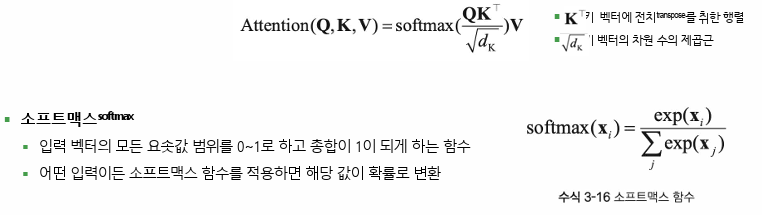
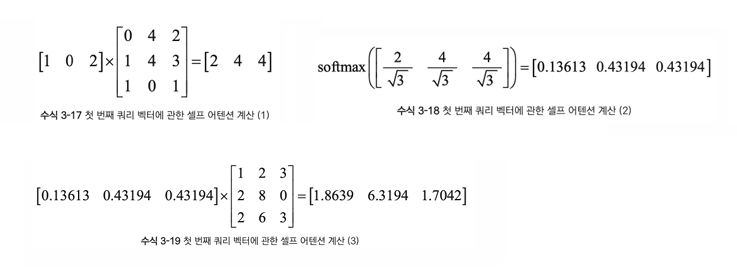
3. 두 번째 쿼리의 셀프 어텐션 출력 값 계산하기
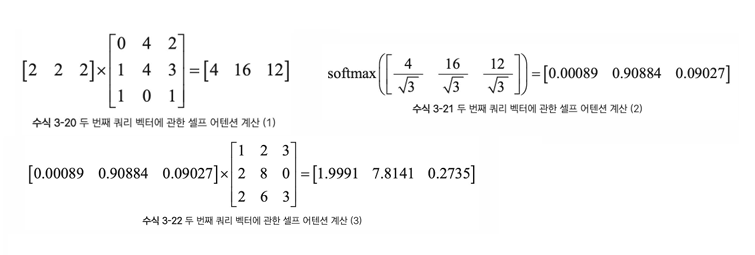
4. 세 번째 쿼리의 셀프 어텐션 출력값 계산하기
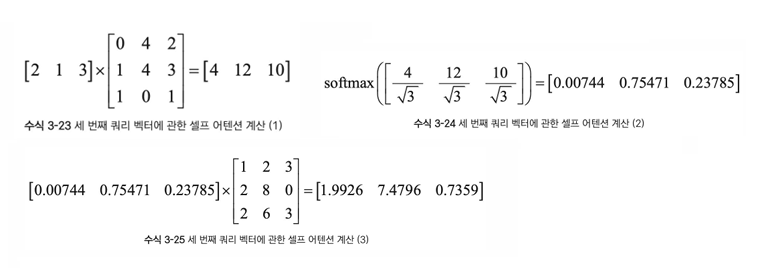


## 멀티 헤드 어텐션(multi-head attention)
- 셀프 어텐션을 동시에 여러번 수행하는 것
- 여러 헤드가 독자적으로 셀프 어텐션 계산
- 개별 헤드의 세릎 어텐션 수행 결과는 '입력 단어 수 * 밸류 차원 수'
- 멀티 헤드 어텐션의 최종 수행 결과는 '입력 단어 수 * 목표 차원 수'

### 인코더에서 수행하는 셀프 어텐션
- 인코더 블록의 입력
    - 이전 블록의 단어 벡터 시퀀스
- 출력
    - 이번 블록 수행 결과로 도출된 단어 벡터 시퀀스
- 인코더에서 수행되는 셀프 어텐션은 쿼리, 키, 밸류가 모두 소스 시퀀스와 관련된 정보
- 소스 시퀀스 내의 모든 단어 쌍 사이의 관계를 고려

### 디코더에서 수행하는 셀프 어텐션
- 디코더 입력
    - 인코더 마지막 브록에서 나온 소스 단어 벡터 시퀀스
    -이전 디코더 블록의 수행 결과로 도출된 타깃 단어 벡터 시퀀스
- 타깃 언어의 단어 벡터 시퀀스를 계산 대상으로 마스크 멀티 헤드 어텐션
- 쿼리, 키로 계산한 소프트맥스 확률과 밸류 벡터를 가중합해서 셀프 어텐션 계산


## 트랜스포머에 적용된 기술들
### 피드포워드 뉴럴 네트워크(feedforward neural network)
- 입력은 현재 블록의 멀티 헤드 어텐션의 개별 출력 벡터
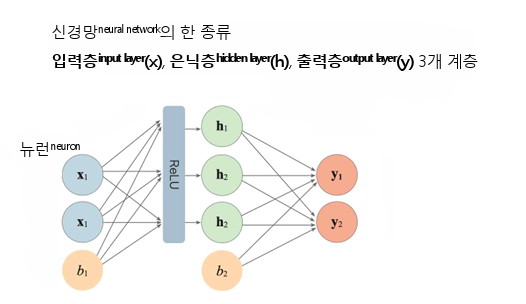
- 뉴런과 뉴런 사이의 계산 과정
    - 이전 뉴런값 x와 그에 해당하는 가중치 w를 가중합합 결과에 바이어스 b를 더해 만듬
    - 가중치들과 바이어스는 학습 과정에서 업데이트
- 활성 함수 f는 현재 계산하고 있는 뉴런의 출력을 일정 범위로 제한하는 역할
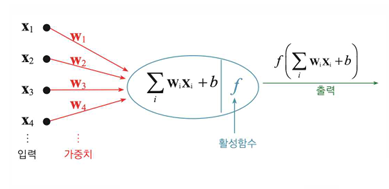
- ReLU
    - 트랜스포머에서 사용하는 피드포워드 뉴럴 네트워크의 활성 함수
    - 양수 입력은 그대로 흘려보내되 음수 입력은 모두 0으로 치환해 무시
###### 잔차 연결
- 블록이나 레이어 계산을 건너뛰는 경로를 하나 두는 것
- 잔차 연결을 블록마다 설정해둠으로써 모두 8가지의 새로운 경로가 생김
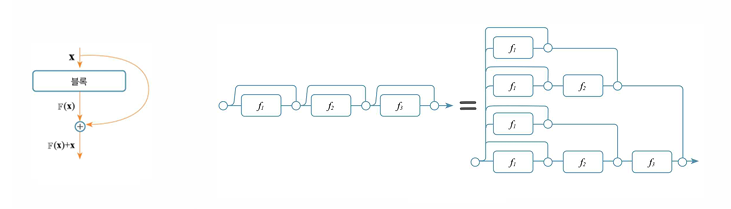

###### 레이어 정규화
- 미니 배치의 인스턴스 별로 평군을 빼주고 표준편차로 나눠 정규화를 수행하는 방법
- 학습이 안정되고 그 속도가 빨라지는 등의 효과
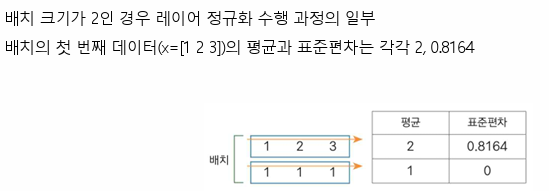
- LayerNorm 객체는 이 두 객체를 1과 0으로 초기화
- 학습 초기 정규화 수행은 배치 인스턴스의 평균을 빼고 표주년차로 나눈 결과에 1을 곱한 후 0을 더함


### 모델 학습 기법
1. 드롭아웃
- 과적합 현상을 방지하고자 뉴런의 일부를 확률적으로 0으로 대치하여 계산에서 제회하는 기법
    - 과적합 : 학습 데이터에서는 오차가 적지만, 실전 데이터에서는 오차가 큼
    - torch.nn.Dropout(p=0.2) : 드롭아웃 수행 비율이 평균적으로 20%, 각 요솟값에 1/(1-p)를 곱하는 역할
- 학습 과정에만 적용하고 학습이 끝나고 나서 인퍼런스 과정에서는 적용하지 않음
2. 아담 옵티마이저
- 딥러닝 모델 학습은 모델 출력과 정답 사이의 오차를 최소화하는 방향을 구하고, 이 방향에 맞춰 모델 전체의 파라미터들을 업데이트하는 과정
    - 그레이디언트(gradient) : 오차를 최소화하는 방향
    - 최적화(optimization) : 오차를 최소화하는 과정
- 순전파(forward propagation)
    - 오차를 구하려고 모델 처음부터 끝까지 순서대로 계산해 보는 과정
- 역전파(backward propagation)
    - 미분으로 오차를 최소화하는 그레이디언트를 구함
    - 미분의 연쇄법칙에 따라 모델 파라미터별 그레이디언트도 구함
- 모델 파라미터를 업데이트하는 과정, 즉 학습과정은 미니 배치 단위로 이루어짐
- 파라미터를 업데이트 할 때 중요한것은 방향과 보폭
<br>
- 오차를 줄이는 성능이 좋아서 트랜스포머 말고도 다양한 모델 학습에 널리 쓰이고 있음
- 방향과 보폭을 적절하게 정해줌
- 현재 위치에서 경사가 가장 급한 쪽으로 내려가되, 여태까지 내려오던 관성을 일부 유지


## BERT와 GPT 비교
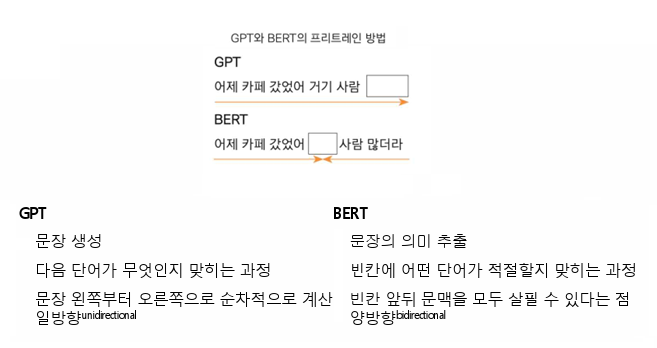
#### GPT 구조
- 트랜스포머에서 인코더를 제외하고 디코더만 사용<br>
<br>

**셀프 어텐션**<br>
- 정답 단어 '카페'를 맞힐 때 '어제'라는 단어만 참고, 정답에 해당하는 확률을 높이고 나머지 단어의 확률은 낮아지도록 모델 업데이트
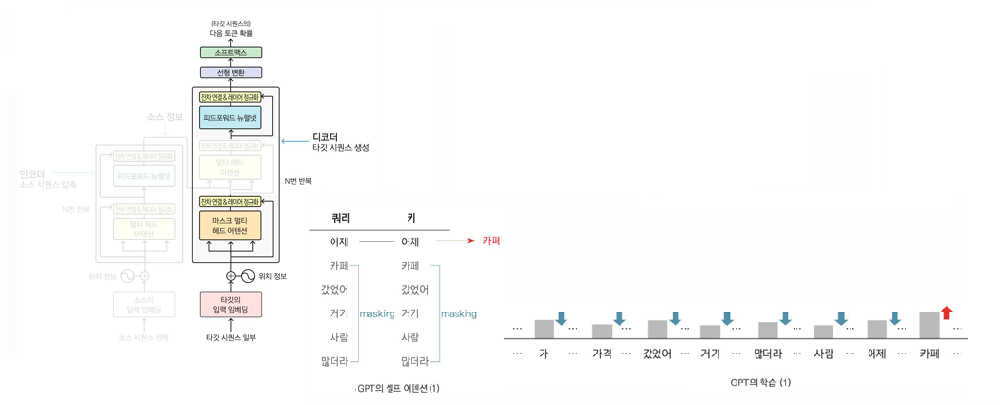
#### BERT 구조
- 트렌스포머에서 디코더를 제외하고 인코더만 사용<br>
<br>

**셀프 어텐션**
- 입력 단어 시퀀스가 "어제 카페 갔었어 [MASK] 사람 많더라"
- 빈칸의 정답인 "거기"에 해당하는 확률을 높이고 나머지의 확률은 낮아지도록 모델 전체 업데이트
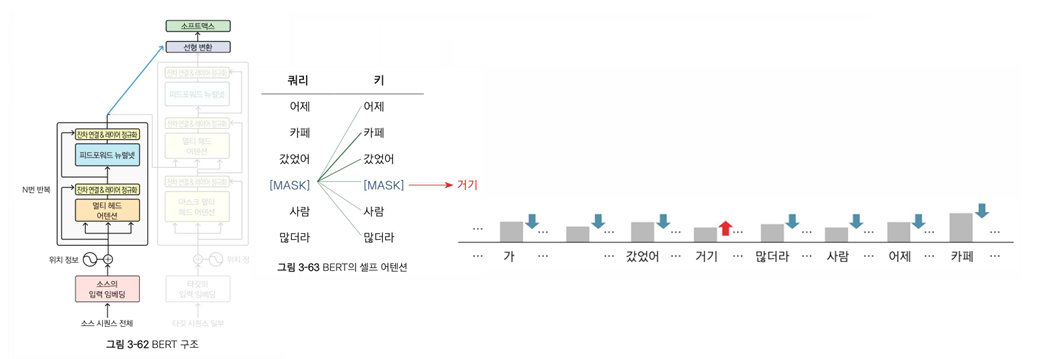


### 최근 트렌드
- 모델 크기 증가 추세
    - OpenAI에 따르면 모델 크기 증가는 언어 모델 품질은 물론 각종 다운스트림 태스크의 성능 개선에 큰 도움이 된다고 함
- 모델 성능을최대한 유지, 계산량 혹은 모델의 크기를 줄이려는 시도
